In [2]:
# Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

import matplotlib
from matplotlib import rc
rc('text', usetex=True)
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=25)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=25)


matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{graphics,graphicx,rotating,amsmath}'
]

matplotlib.rcParams['font.serif'] = ['Computer Modern Roman'] + matplotlib.rcParams['font.serif']

%matplotlib inline  

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from scipy.optimize import fsolve

In [4]:
gx = 1

branchingMC = 1/(3*6) 

cxn3000= .03951
cxn5000= .0103

factor=1
limcxn3000 = (4e-2 /(.47*.75)) *factor
limcxn5000 = (3e-3 /(.31*.75)) *factor

print(limcxn3000)
print(limcxn5000)

gx=1
gq3000= fsolve(lambda gq: limcxn3000 - cxn3000* gq**2. * (gq**2.*(3.*5.) / (gq**2.*(3.*6.) + gx**2.*(3.*2.)) ), .1)[0]
gq5000= fsolve(lambda gq: limcxn5000 - cxn5000* gq**2. * (gq**2.*(3.*5.) / (gq**2.*(3.*6.) + gx**2.*(3.*2.)) ), .1)[0]

print(gq3000)
print(gq5000)

lambda_3000 = 3000/gq3000
lambda_5000 = 5000/gq5000

0.113475177305
0.0129032258065
1.93716661491
1.3357202357


In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 7

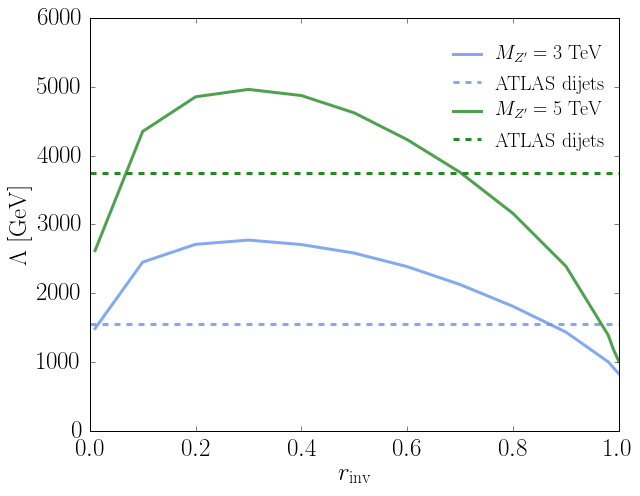

In [6]:
fig=plt.figure("m", figsize=(9,7))
plt.subplots_adjust(left=0.2, right=0.90, top=0.9, bottom=0.2)

scale0=3000
rinv=[.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.98,.99,1]
scale_factors=np.array([  16.65288478,    2.24727784,    1.50436714,    1.37437737,    1.51087856,
    1.82360243,    2.5037579,     3.97729772,    7.58550299,   19.16986201,
   80.65051381,  115.87687983,  171.6086075 ]
)
cutoff_3000=scale0/(scale_factors)**(1/4)
plt.plot(rinv, cutoff_3000, color='cornflowerblue', lw=3, alpha=.8,label=r"$M_{Z^\prime} = 3 \;\textrm{TeV}$")
plt.axhline(lambda_3000, color='cornflowerblue', ls='--', lw=3, alpha=.8,
            label=r'$\textrm{ATLAS dijets}$')

scale0=5000
rinv=[.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.98,.99,1]
scale_factors=np.array([  13.30830491,    1.74678879,    1.12634779,    1.03160959,    1.10951256,
    1.37180559,    1.9500908,     3.14228233,    6.28311033,   19.1438003,
  167.72897938,  323.52898948,  597.95894646])
cutoff_5000=scale0/(scale_factors)**(1/4)
plt.plot(rinv, cutoff_5000, color='forestgreen', lw=3,alpha=.8,label=r"$M_{Z^\prime} = 5 \;\textrm{TeV}$")
plt.axhline(lambda_5000, color='forestgreen', ls='--', lw=3, label=r'$\textrm{ATLAS dijets}$')

plt.legend(bbox_to_anchor=(0, 0, .99, 0.95),
           fontsize=20, ncol=1,frameon=False,
           handletextpad=.4, columnspacing=.8,
           borderaxespad=0.)


plt.xlim(0,1)
plt.ylim(0,6000)
# plt.xscale("log")
plt.ylabel(r"$\Lambda\; [\textrm{GeV}]$",fontsize=25)
plt.xlabel(r"$r_\mathrm{inv}$",fontsize=25)

plt.tight_layout()
plt.savefig("Z_resonance.pdf")

In [9]:
print("ATLAS dijets resonance")
print(lambda_3000)
print(lambda_5000)

print("")
print("semivisible resonance")
print(cutoff_3000)
print(cutoff_5000)

ATLAS dijets resonance
1548.65357316
3743.29883336

semivisible resonance
[ 1485.07670378  2450.23118162  2708.83651508  2770.73350109  2705.91322419
  2581.59858384  2384.91646329  2124.34099165  1807.69500818  1433.7271455
  1001.0815793    914.37018511   828.87012743]
[ 2617.81721115  4349.2052669   4853.46471387  4961.25056813  4871.77192798
  4620.05198494  4231.12928779  3755.42163159  3158.10331018  2390.35808878
  1389.37019555  1178.94000269  1011.11874624]
